In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter
print("Setup Complete")

Setup Complete


In [2]:
data = pd.read_excel('/kaggle/input/python-past-present-future/Python-Training.xlsx')

data.head(5)

,Year,Version,Version Rel_Date,Added Features,Num Users
0,1991,0.9,1991-02-20,Initial release of Python.,3000.0
1,1992,0.9,1991-02-20,NaN,5000.0
2,1993,0.9,1991-02-20,NaN,9530.0
3,1994,1.0,1994-01-26,"New features for functional programming, inclu...",15430.0
4,1994,1.1,1994-10-11,"""with"" statement, ternary conditional operator...",26500.0


In [3]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

make_data_table(data, 'Data')

,Year,Version,Version Rel_Date,Added Features,Num Users
0,1991,0.90,1991-02-20,Initial release of Python.,3.000000e+03
1,1992,0.90,1991-02-20,NaN,5.000000e+03
2,1993,0.90,1991-02-20,NaN,9.530000e+03
3,1994,1.00,1994-01-26,"New features for functional programming, including lambda, map, filter and reduce.",1.543000e+04
4,1994,1.10,1994-10-11,"""with"" statement, ternary conditional operator, ""yield from"" delegation for generators, exception chaining, relative and conditional package imports, string formatting improvements, the ""sorted()"" function, the ""set"" built-in data type",2.650000e+04
5,1995,1.20,1995-04-13,"""email"" and ""mimetypes"" modules, improvements to the Windows port, extensions to the Tkinter GUI toolkit",3.460000e+04
6,1995,1.30,1995-10-13,"""marshal"" and ""pickle"" modules for object serialization, improvements to the ""time"" module",6.425000e+04
7,1996,1.40,1996-10-25,Modula-3 style keyword arguments and support for complex number operations.,9.542000e+04
8,1997,1.40,1996-10-25,NaN,1.054000e+05
9,1998,1.50,1998-01-03,"Support for arbitrary-length integers, and a new garbage collection system.",1.603000e+05


<function __main__.make_data_table(dataset, title)>

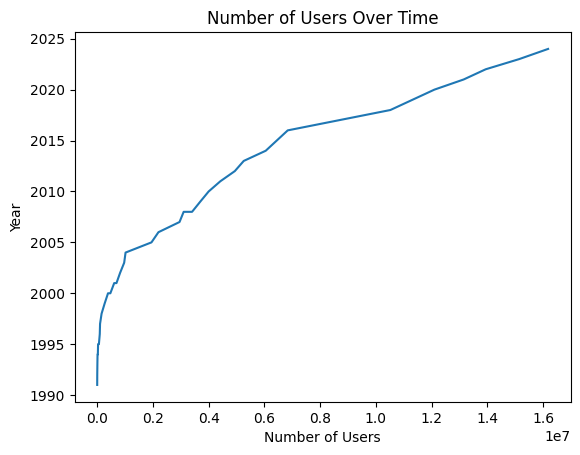

In [5]:
y = data['Num Users']
X = data['Year']

fig, ax = plt.subplots()
ax.plot(y,X)
plt.title('Number of Users Over Time')
plt.ylabel('Year')
plt.xlabel('Number of Users')
plt.show()

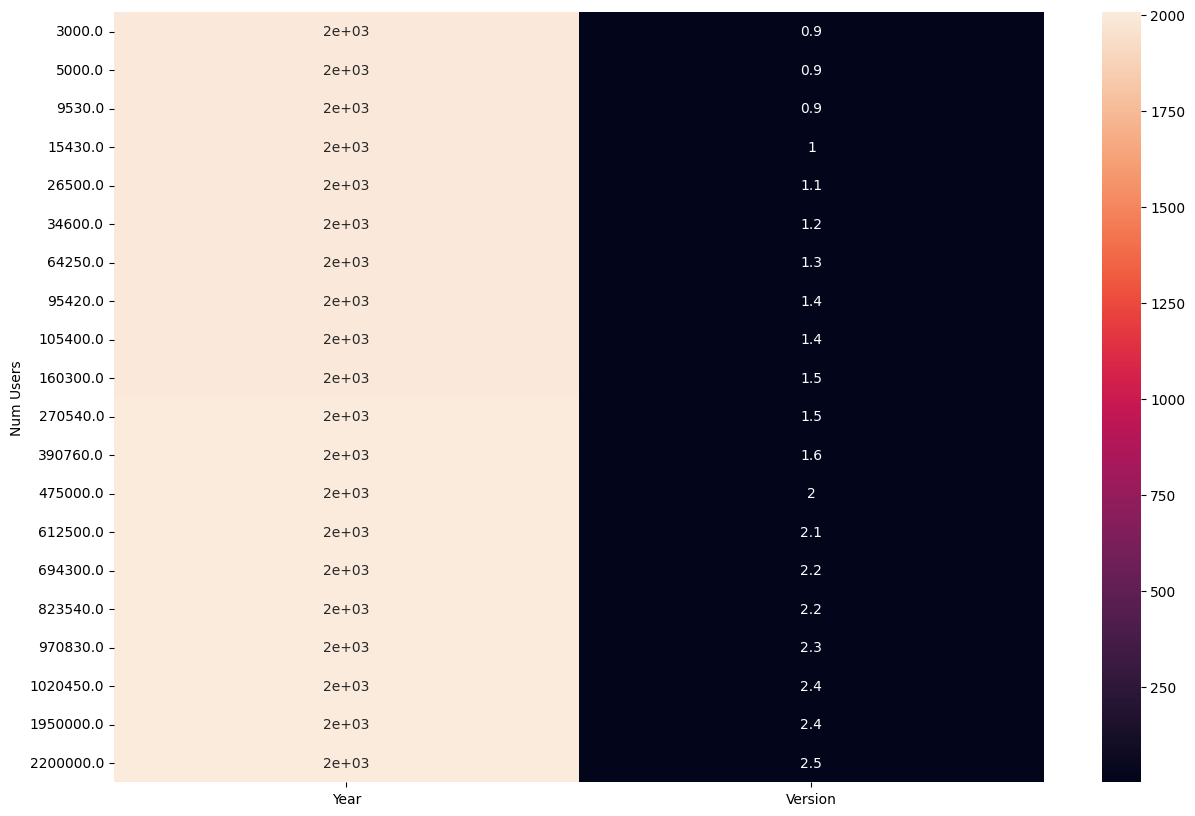

In [6]:
heatmap = data.set_index('Num Users')
topi=heatmap.iloc[:20,:]
topi_f = topi.loc[:,['Year', 'Version']]

plt.figure(figsize=(15,10))
sns.heatmap(data=topi_f, annot=True)
plt.show()

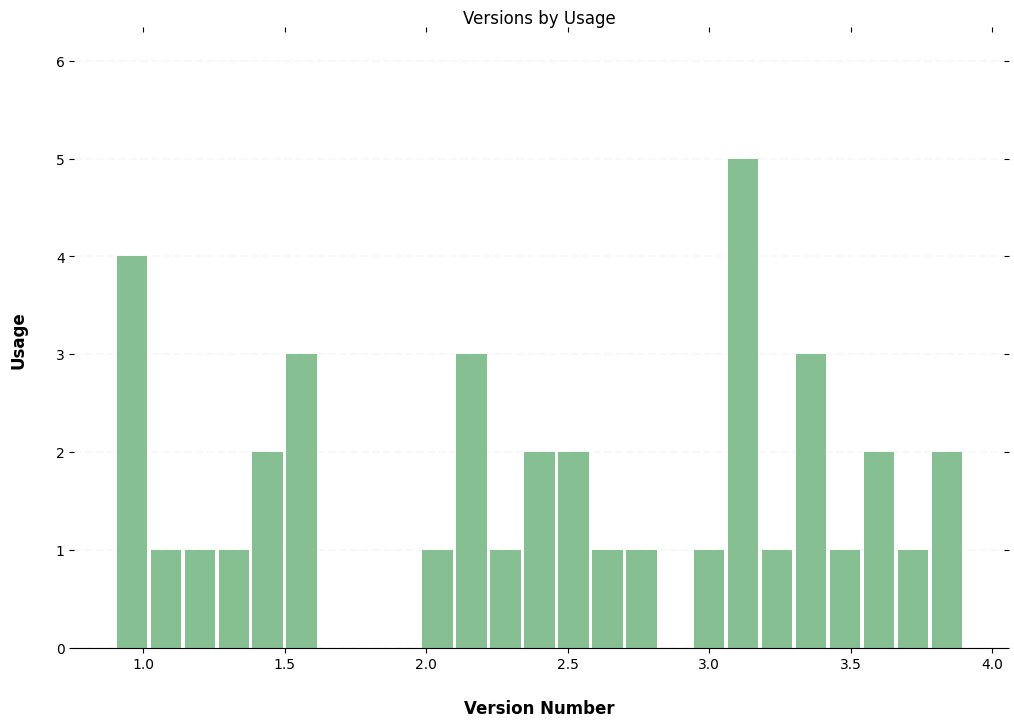

In [7]:
ax = data.hist(column='Version', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Versions by Usage")

    # Set x-axis label
    x.set_xlabel("Version Number", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Usage", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [8]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(data[['Year']], data['Num Users'])

# Generate future years starting from the next year after the maximum year in the dataset
future_years = np.array([[year] for year in range(data['Year'].max() + 1, data['Year'].max() + 100)])

# Predict the future of the target column for the specified future years
future_target = model.predict(future_years)

# Create a DataFrame with future years as the index column and the predicted target values
future_df = pd.DataFrame(future_target, index=future_years.flatten(), columns=['Num Users'])
future_df.index.name = 'Year'

print(future_df)

         Num Users
Year              
2025  1.275954e+07
2026  1.322431e+07
2027  1.368908e+07
2028  1.415385e+07
2029  1.461862e+07
...            ...
2119  5.644784e+07
2120  5.691261e+07
2121  5.737737e+07
2122  5.784214e+07
2123  5.830691e+07

[99 rows x 1 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


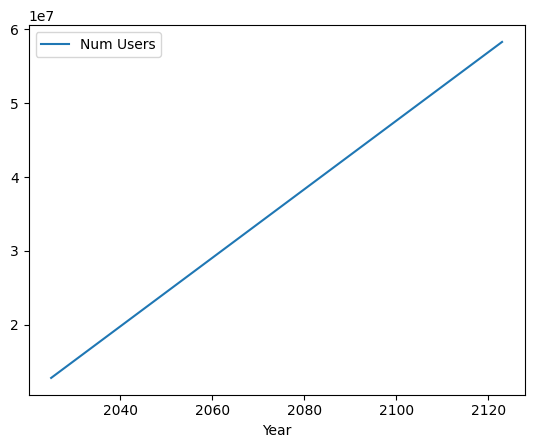

In [9]:
lines = future_df.plot.line()

In [10]:
future_df.to_csv('Python_Future.csv', index=False)
print("Output Generated Successfully")

Output Generated Successfully
